In [1]:
%pip install pandas numpy xgboost scikit-learn ta matplotlib

import pandas as pd 
import numpy as np
from xgboost import XGBClassifier, XGBRegressor 
from sklearn.metrics import accuracy_score 
import ta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.7 MB/s eta 0:00:0000:0100:010m
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=05d5a367d5b26857bb26082a9f4d7d1c08974949a448b22cdd1ec07c42579fa6
  Stored in directory: /Users/jamesng/Library/Caches/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('^GSPC_10years_with_indicators.csv')
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Close']])
df["Close"]= scaled

In [4]:
# df1= df[df["DATEDEAL"]>= 20091101]
# df1= df1[df1["DATEDEAL"]< 20171230]
# df1.reset_index(inplace= True)
# df = df1
df

,Date,Open,High,Low,Close,Adj Close,Volume,ATR,ADX,MACD,MACD_Signal,CAGR
0,2014-01-03,1833.209961,1838.239990,1829.130005,0.029293,1831.369995,2774270000,NaN,NaN,NaN,NaN,0.100665
1,2014-01-06,1832.310059,1837.160034,1823.729980,0.027787,1826.770020,3294850000,NaN,NaN,NaN,NaN,0.100665
2,2014-01-07,1828.709961,1840.099976,1828.709961,0.031424,1837.880005,3511750000,NaN,NaN,NaN,NaN,0.100665
3,2014-01-08,1837.900024,1840.020020,1831.400024,0.031296,1837.489990,3652140000,NaN,NaN,NaN,NaN,0.100665
4,2014-01-09,1839.000000,1843.229980,1830.380005,0.031506,1838.130005,3581150000,NaN,NaN,NaN,NaN,0.100665
...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2023-12-22,4753.919922,4772.939941,4736.770020,0.986273,4754.629883,3046770000,41.270599,37.232488,77.173143,73.625472,0.100665
2511,2023-12-26,4758.859863,4784.720215,4758.450195,0.992860,4774.750000,2513910000,40.525248,37.904104,77.822249,74.464827,0.100665
2512,2023-12-27,4773.450195,4785.390137,4768.899902,0.995096,4781.580078,2748450000,38.922914,38.546908,77.988793,75.169621,0.100665
2513,2023-12-28,4786.439941,4793.299805,4780.979980,0.995675,4783.350098,2698860000,37.149374,39.217254,77.371714,75.610039,0.100665


In [5]:
def Make_Indicators(df):
    global sma, ema, sto_k, sto_d, rsi, macd, disparity
    sma = ta.trend.sma_indicator(df["Close"], 12)
    ema = ta.trend.ema_indicator(df["Close"],12)
    sto_k = ta.momentum.stochrsi_k(df["Close"])
    sto_d = ta.momentum.stochrsi_d(df["Close"])
    rsi = ta.momentum.rsi(df["Close"], 14)
    macd = ta.trend.macd(df["Close"], 13, 26)
    df["MA"]= df["Close"].rolling(20).mean()
    disparity = 100*(df["Close"]/df["MA" ])

In [9]:
def Concat_ind(dataFrame) :
    global x, y
    
    x = np.zeros((len(df)-40-1,8) )
    idx = 0
    for i in range(40, len(df)-1):
        x[idx][0]= sma[i]
        x[idx][1]= ema[i]
        x[idx][2]= sto_k[i]
        x[idx][3]= sto_d[i]
        x[idx][4]= rsi[i]
        x[idx][5]= macd[i]
        x[idx][6]= disparity[i]
        x[idx][7]= df["Close"][i]
        idx += 1
        
    y = np.zeros((len(df)-40-1,1))
    idx2 = 0
    for j in range(40, len(df)-1) :
        y[idx2][0]= df["Close"][j+1]
        idx2 += 1

In [7]:
def Slice_Window(size) :
    global X, Y
    X =[]
    Y =[]
    size = size
    idx = 0
    for i in range(0, len(x)-size+1):
        x_1 =[]
        y_1 =[]
        for j in range(size):
            x_1.append(x[i+j][0])
            x_1.append(x[i+j][1])
            x_1.append(x[i+j][2])
            x_1.append(x[i+j][3])
            x_1.append(x[i+j][4])
            x_1.append(x[i+j][5])
            x_1.append(x[i+j][6])
            x_1.append(x[i+j][7])
            
        y_1.append(y[i+(size-1)][0])
        X.append(x_1)
        Y.append(y_1)
    print(np.shape(X))

In [10]:
Make_Indicators(df)
Concat_ind(df)
Slice_Window(10)

(2465, 80)


In [ ]:
model = XGBRegressor(max_depth =5, n_estimators = 300, learning_rate = 0.50)
model.fit(X[:1400], Y[:1400])
y_pred = model.predict(X[1400:])

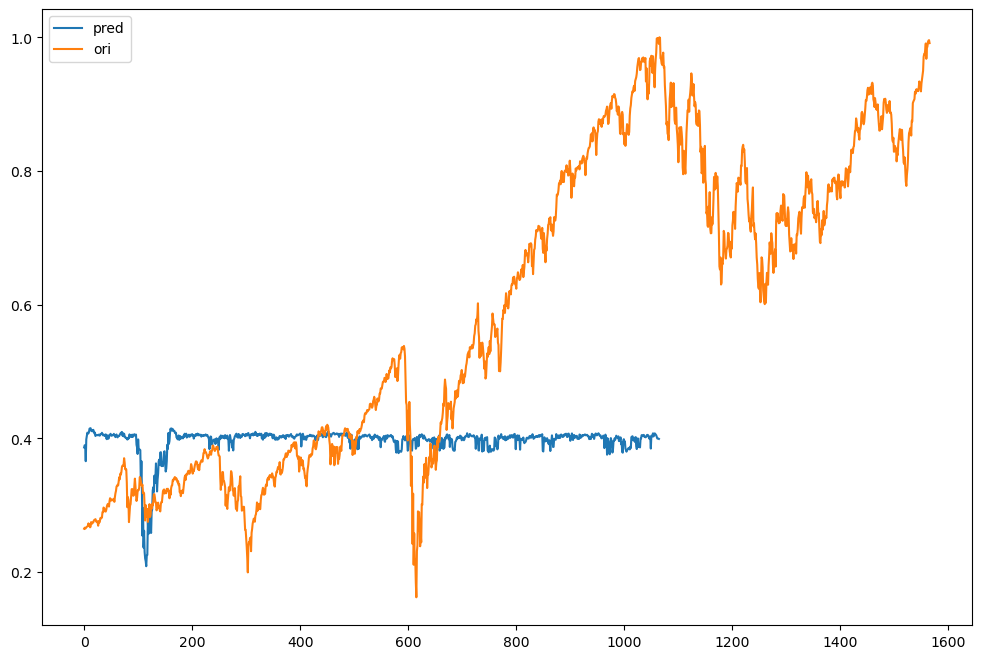

In [14]:
plt.figure(figsize=(12,8))
plt.plot(y_pred, label = 'pred')
plt.plot(Y[899:], label = 'ori')
plt.legend()

In [ ]:
same_count = 0
Y2 = Y[1399:]
for i in range(len(y_pred)):
  if i> 0:
    cha = y_pred[i] - y_pred[i-1]
    cha2 = Y2 [i] [0] - Y2[i-1][0]
    if cha >= 0 and cha2 >= 0:
      same_count += 1
    if cha < 0 and cha2 < 0:
      same_count += 1

acc = round (same_count / (len (y_pred)-1) *100, 2)
print("Accuracy : {}%".format(acc))

In [ ]:
df = pd. read_csv ('D: /XGBoost/data/Samsung. txt', sep = ', ')

In [ ]:
Make_Indicators(df)
Concat_ind (df)
Slice_Window(10)